In [1]:
from deepface import DeepFace
import pandas as pd
import seaborn as sns
import numpy as np
from pathlib import Path
from shutil import copyfile
from tqdm.notebook import tqdm
import itertools
from tqdm.notebook import tqdm
import numpy as np

tqdm.pandas()

from sklearn.model_selection import train_test_split

np.random.seed(2137)

2024-04-05 18:03:13.962212: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-05 18:03:13.997785: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-05 18:03:14.640052: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


narysuj krzywe FAR,
FRR,
wyznacz EER
narysuj ROC


zmierz PSNR,
SSIM oraz BRISQUE.

In [2]:
identity_df = pd.read_csv("./data/identity_CelebA.txt", sep=" ", header=None, names=["image", "identity"])
identity_df

,image,identity
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295
...,...,...
202594,202595.jpg,9761
202595,202596.jpg,7192
202596,202597.jpg,9852
202597,202598.jpg,5570


<Axes: xlabel='Count', ylabel='identity'>

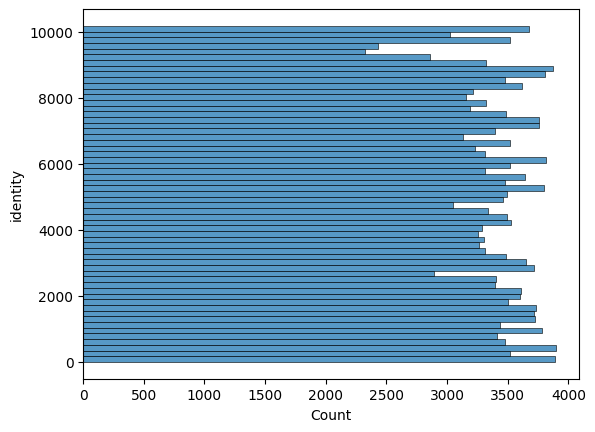

In [3]:
sns.histplot(
    data=identity_df,
    y="identity",
)

In [4]:
random_identities = np.random.choice(identity_df["identity"].unique(), 80)

In [5]:
random_identities

array([ 5621,  7961,  4737,  5846,  9450,  5041,  8492,  4373,  8990,
          74,  9169,  8273,   739,  4341,  7518,  7484,  8711,  2088,
        4672,  6157,  5662,  5883,  4669,  4622,  2128,  7548,  5854,
          26,  2546,  8020,  8446,  4884,  1221,  5829,  5876,  3907,
        2495,  4046,  6811,  1655,  1128,  2476,  9303,  2909,  2891,
        3713,  6352,   905,  7399,  1634,  4362,  1912,  9709,  7837,
        3684,  3809,  8635, 10151,  2767,  5222,  2039,   124,  5487,
          53,  6705,   396,  5359,  6436,  5183,  3673,  2051,  3198,
         523,  9155,  9395,  6350,  5919,  8741,  2402,    65])

In [6]:
dataset_df = identity_df[identity_df["identity"].isin(random_identities)]
dataset_df

,image,identity
39,000040.jpg,2088
92,000093.jpg,7399
249,000250.jpg,9450
254,000255.jpg,1634
389,000390.jpg,8741
...,...,...
202002,202003.jpg,8446
202145,202146.jpg,9169
202208,202209.jpg,8446
202485,202486.jpg,5876


In [7]:
idendities = {
    identity_id: identity_df[identity_df["identity"] == identity_id]["image"].tolist()
    for identity_id in random_identities
}

In [8]:
positives = []
for key, values in idendities.items():
 for i in range(0, len(values)-1):
  for j in range(i+1, len(values)):
   positive = []
   positive.append(values[i])
   positive.append(values[j])
   positives.append(positive)

positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = 1

positives

,file_x,file_y,decision
0,183465.jpg,184422.jpg,1
1,183465.jpg,187526.jpg,1
2,183465.jpg,188093.jpg,1
3,183465.jpg,188883.jpg,1
4,183465.jpg,188957.jpg,1
...,...,...,...
19742,149626.jpg,152302.jpg,1
19743,149626.jpg,159459.jpg,1
19744,151595.jpg,152302.jpg,1
19745,151595.jpg,159459.jpg,1


In [9]:
samples_list = list(idendities.values())
 
negatives = []
for i in range(0, len(idendities) - 1):
   for j in range(i+1, len(idendities)):
      cross_product = itertools.product(samples_list[i], samples_list[j])
      cross_product = list(cross_product)

   for cross_sample in cross_product:
      negative = []
      negative.append(cross_sample[0])
      negative.append(cross_sample[1])
      negatives.append(negative)
 
negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["decision"] = 0

negatives

,file_x,file_y,decision
0,183465.jpg,000854.jpg,0
1,183465.jpg,006185.jpg,0
2,183465.jpg,008791.jpg,0
3,183465.jpg,012357.jpg,0
4,183465.jpg,045247.jpg,0
...,...,...,...
48835,136654.jpg,145844.jpg,0
48836,136654.jpg,149626.jpg,0
48837,136654.jpg,151595.jpg,0
48838,136654.jpg,152302.jpg,0


In [10]:
IMAGES_DIR = Path("./data/img_celeba.7z")

In [11]:
df = pd.concat([positives, negatives]).reset_index(drop = True)

df.file_x = IMAGES_DIR / df.file_x
df.file_y = IMAGES_DIR / df.file_y

df

,file_x,file_y,decision
0,data/img_celeba.7z/183465.jpg,data/img_celeba.7z/184422.jpg,1
1,data/img_celeba.7z/183465.jpg,data/img_celeba.7z/187526.jpg,1
2,data/img_celeba.7z/183465.jpg,data/img_celeba.7z/188093.jpg,1
3,data/img_celeba.7z/183465.jpg,data/img_celeba.7z/188883.jpg,1
4,data/img_celeba.7z/183465.jpg,data/img_celeba.7z/188957.jpg,1
...,...,...,...
68582,data/img_celeba.7z/136654.jpg,data/img_celeba.7z/145844.jpg,0
68583,data/img_celeba.7z/136654.jpg,data/img_celeba.7z/149626.jpg,0
68584,data/img_celeba.7z/136654.jpg,data/img_celeba.7z/151595.jpg,0
68585,data/img_celeba.7z/136654.jpg,data/img_celeba.7z/152302.jpg,0


In [ ]:
def _verify_face_pair(row):
    try:
        pred = DeepFace.verify(
            img1_path=row["file_x"],
            img2_path=row["file_y"],
            model_name="VGG-Face",
            distance_metric="cosine",
        )
    except Exception as e:
        print(f'{row["file_x"]=}\n{row["file_y"]}\nError: {e}\n')
        pred = np.nan
    return pred

df = df.sample(frac=0.01).reset_index(drop=True)

df["prediction"] = df.progress_apply(_verify_face_pair, axis=1)
df["distance"] = df["prediction"].apply(lambda x: x["distance"] if not pd.isna(x) else x)

<Axes: ylabel='Density'>

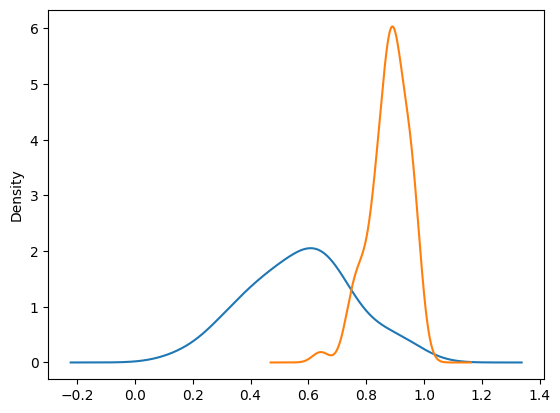

In [14]:
df[df.decision == True].distance.plot.kde()
df[df.decision == False].distance.plot.kde()

In [15]:
tp_mean = df[df.decision == True].mean().values[0]
tp_std = df[df.decision == True].std().values[0]
fp_mean = df[df.decision == False].mean().values[0]
fp_std = df[df.decision == False].std().values[0]

print(f"""\
Mean of True Positives: {tp_mean:.4f}
Std of True Positives: {tp_std:.4f}
Mean of False Positives: {fp_mean:.4f}
Std of False Positives: {fp_std:.4f}    
""")

Mean of True Positives: 1.0000
Std of True Positives: 0.0000
Mean of False Positives: 0.0000
Std of False Positives: 0.0000    

